#### Machine Learning CEP


#### Group Members:  
Ifra Siddiqui  (CS-307)
Aleena Fatima  (CS-305)
Waseela        (CS-303)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib.pyplot import rcParams

In [2]:
df=pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## **EXPLORATORY DATA ANALYSIS**

In [3]:
df.shape

(96453, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

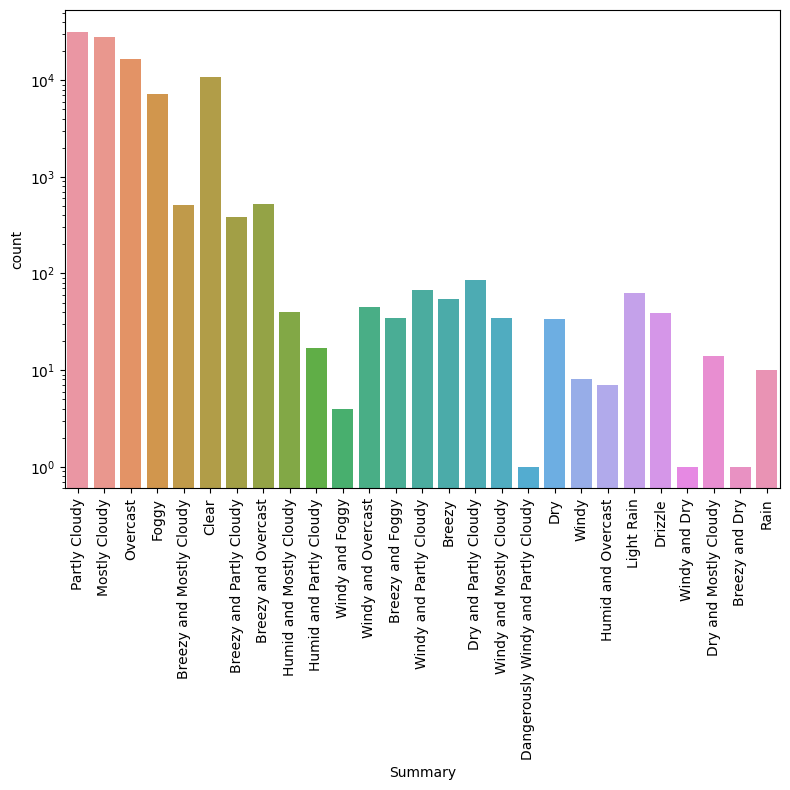

In [7]:
plt.rcParams['figure.figsize'] = 8, 8
sns.countplot(x='Summary', data=df)
plt.yscale('log')  # set the x-axis scale to a logarithmic scale. to make the smaller values more visible in the plot.
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig('SummaryCountPlot.png', dpi=300)
plt.show()

In [8]:
Summary_Weather=df["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


In [9]:
# List of values to drop from summary 
values_to_drop = ['Breezy and Dry', 'Windy', 'Humid and Overcast', 'Windy and Foggy', 'Windy and Dry','Dangerously Windy and Partly Cloudy']

# Droping rows with specified values in the "summary" column
df = df[~df['Summary'].isin(values_to_drop)]

# Reseting the index
df.reset_index(drop=True, inplace=True)

# Displaying the updated DataFrame
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96426,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96427,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96428,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96429,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [10]:
#Our target after dropping least valued classes
Summary_Weather=df["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


## **MERGING CLASSES FOR OUR TARGET VARIABLE (REDUCING UPTO 15 CLASSES)**

In [11]:
# Mapping for merging classes
class_mapping = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Breezy and Overcast': 'Breezy',
    'Breezy and Mostly Cloudy': 'Breezy',
    'Breezy and Partly Cloudy': 'Breezy',
    'Breezy and Foggy':'Breezy',
    'Breezy and Dry':'Breezy',
    'Dry and Partly Cloudy': 'Dry',
    'Dry and Mostly Cloudy': 'Dry',
    'Windy and Partly Cloudy': 'Windy',
    'Windy and Mostly Cloudy': 'Windy',
    'Windy and Overcast':'Windy',
    'Humid and Mostly Cloudy': 'Humid',
    'Humid and Partly Cloudy':'Humid',
    'Humid and Overcast':'Humid',
    'Drizzle':'Light Rain',
    'Rain':'Light Rain',
    'Windy and Foggy':'Windy',
    'Windy and Dry':'Windy'
}

# Maping the classes to the merged classes, keeping the unmapped classes as is:
df['Summary'] = df['Summary'].map(class_mapping).fillna(df['Summary'])

# Checking the distribution of the classes
#class_counts = df['Summary'].value_counts()
#print(class_counts)

C:\Users\aleen\AppData\Local\Temp\ipykernel_3264\2152283939.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = df['Summary'].map(class_mapping).fillna(df['Summary'])


In [12]:
Summary_Weather=df["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Cloudy,76424
1,Clear,10890
2,Foggy,7148
3,Breezy,1519
4,Windy,147
5,Dry,134
6,Light Rain,112
7,Humid,57


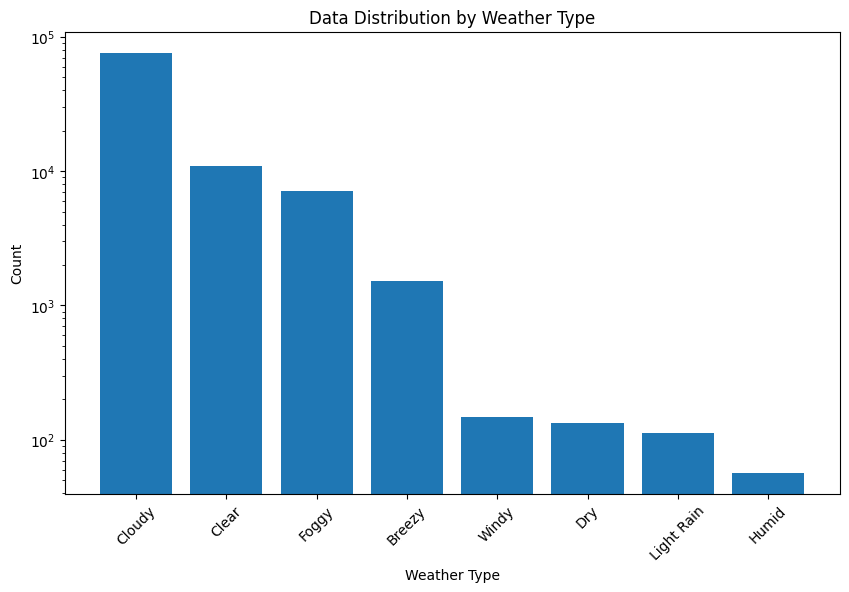

In [13]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(Summary_Weather['Weather Type'], Summary_Weather['Count'])
plt.yscale('log') 
# Set the x-axis and y-axis labels
plt.xlabel('Weather Type')
plt.ylabel('Count')

# Set the plot title
plt.title('Data Distribution by Weather Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Checking for values to drop 

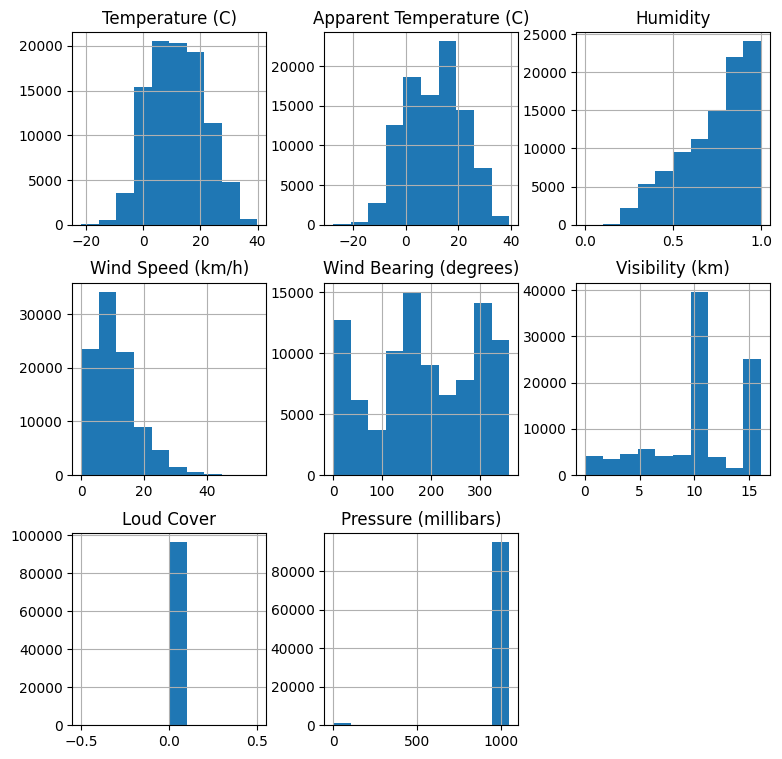

In [14]:
#Quantitative variables:
quantitative = df.select_dtypes(include=["int64", "float64"]).columns
plt.rcParams['figure.figsize'] = 9, 9
df[quantitative].hist()
plt.savefig('histogram.png', dpi=300) 
plt.show()

In [15]:
df['Loud Cover']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96426    0.0
96427    0.0
96428    0.0
96429    0.0
96430    0.0
Name: Loud Cover, Length: 96431, dtype: float64

In [16]:
df['Loud Cover'].unique()

array([0.])

In [17]:
df['Loud Cover'].sum()

0.0

In [18]:
df = df.drop(['Loud Cover','Formatted Date'], axis=1)
df.head()
# 'Loud Cover' takes values zero. We drop it

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In "Pressure (millibars)" some observations are nil. It seems that they lack values. because the pressure does not take zero as value
hence filling the zeros with the median:



<Axes: >

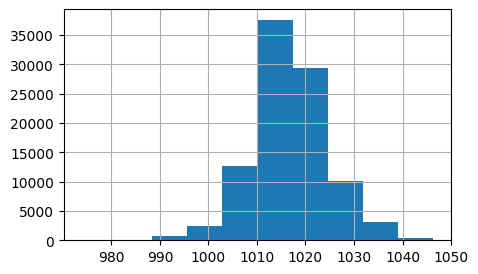

In [19]:
pressure_median = df['Pressure (millibars)'].median()
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x 
df["Pressure (millibars)"] = df.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)
rcParams['figure.figsize'] = 5, 3
df['Pressure (millibars)'].hist()

#### ab isko rakhna hai ya nhi since its not making sense to me and we cant ot explain anytyhing useful

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

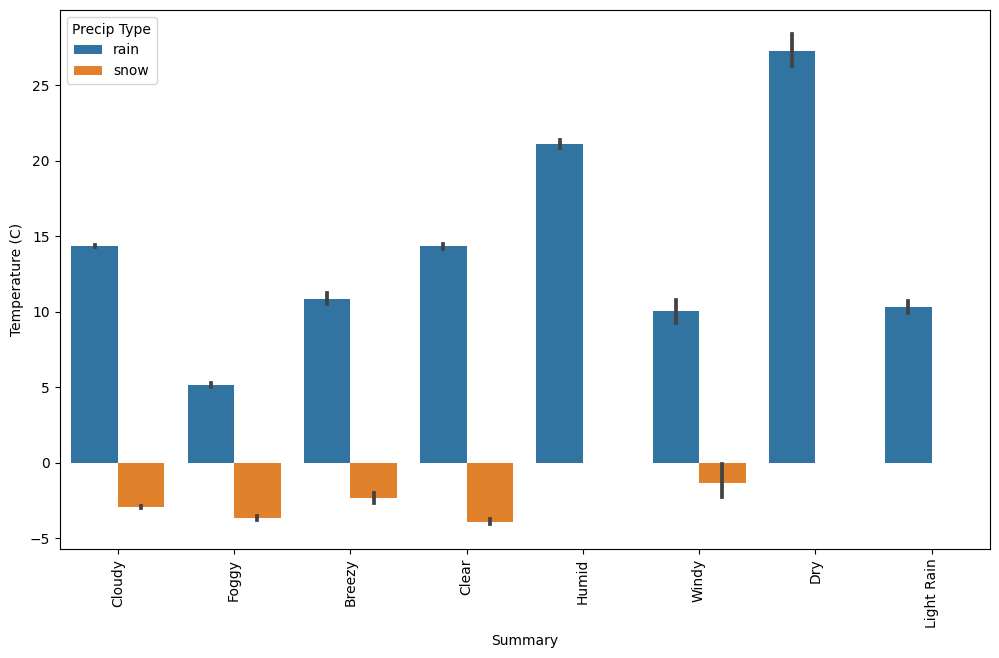

In [20]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df, x="Summary", y="Temperature (C)",hue="Precip Type")

## **HANDLING MISSING VALUES**

In [21]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [22]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

**MODE IMPUTATION**

In [23]:
# Handling Missing Values for 'Precip Type' Using MODE IMPUTATION TECHNIQUE
most_frequent_precip_type = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(most_frequent_precip_type, inplace=True)
# The updated dataset
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
96426,Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96427,Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96428,Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96429,Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [24]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## **ENCODING**

In [25]:
label_encoder=preprocessing.LabelEncoder()

In [26]:
df['Summary']=label_encoder.fit_transform(df['Summary'])
df['Summary'].unique()

array([2, 4, 0, 1, 5, 7, 3, 6])

In [27]:
df['Daily Summary']=label_encoder.fit_transform(df['Daily Summary'])
df['Daily Summary'].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [28]:
df['Precip Type']=label_encoder.fit_transform(df['Precip Type'])
df['Precip Type'].unique()

array([0, 1])

In [29]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,2,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197
...,...,...,...,...,...,...,...,...,...,...
96426,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,170
96427,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,170
96428,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,170
96429,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,170


## **MULTI-COLINEARITY**

In [30]:
correlation = df['Temperature (C)'].corr(df['Apparent Temperature (C)'])
correlation

0.9926338631255961

In [31]:
correlation = df['Wind Speed (km/h)'].corr(df['Wind Bearing (degrees)'])
correlation

0.1035202690089814

### Correlation Matrix

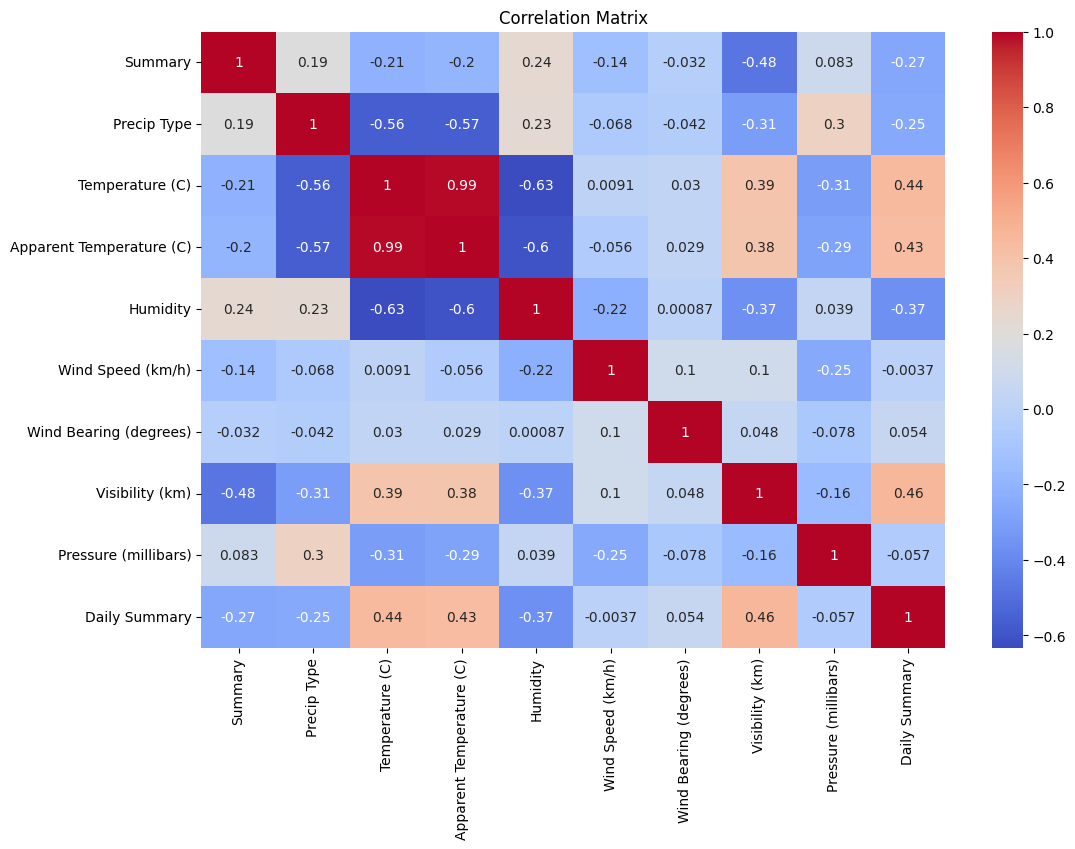

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('CorMat.png') 
plt.show()

### VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numeric features for VIF calculation
numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)','Daily Summary']

# Calculate VIF for each feature
X = df[numeric_columns]  # Assuming all columns are numeric and scaled
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)



                    Feature         VIF
0           Temperature (C)  258.296487
1  Apparent Temperature (C)  199.369767
2                  Humidity   27.970517
3         Wind Speed (km/h)    5.116859
4    Wind Bearing (degrees)    4.133096
5           Visibility (km)    9.741894
6      Pressure (millibars)   64.086666
7             Daily Summary    8.972334


In [34]:
# # As VIF of Temperature (C) is the highest and Temperature is highly correlated with Apparent Temperature, removing it
df.drop(['Temperature (C)'], axis=1, inplace=True)


## **DIVIDING THE DATASET INTO FEATURE AND TARGET**

In [35]:
X=df.drop(['Daily Summary','Summary'],axis=1)
X

,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96426,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96427,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96428,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96429,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [36]:
y=df.Summary
y

0        2
1        2
2        2
3        2
4        2
        ..
96426    2
96427    2
96428    2
96429    2
96430    2
Name: Summary, Length: 96431, dtype: int32

## **SCALING OUR INPUTS(X)**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[-0.35348739, -0.32401881,  0.7934547 , ...,  0.59133147,
         1.30686664, -0.217374  ],
       [-0.35348739, -0.33908047,  0.63997437, ...,  0.66583197,
         1.30686664, -0.15266553],
       [-0.35348739, -0.13808521,  0.7934547 , ...,  0.15364102,
         1.09947842, -0.11254628],
       ...,
       [-0.35348739,  1.04555356, -0.89482898, ..., -1.46674493,
         1.37215552, -0.14878302],
       [-0.35348739,  0.99725237, -0.69018853, ..., -1.55987055,
         1.37215552, -0.11125211],
       [-0.35348739,  0.89597569, -0.63902842, ..., -1.38293186,
         1.23389671, -0.08407455]])

In [38]:
df

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,2,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,2,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,2,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197
...,...,...,...,...,...,...,...,...,...
96426,2,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36,170
96427,2,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16,170
96428,2,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66,170
96429,2,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95,170


In [39]:
New_df=pd.DataFrame(X_scaled)
New_df

,0,1,2,3,4,5,6
0,-0.353487,-0.324019,0.793455,0.480177,0.591331,1.306867,-0.217374
1,-0.353487,-0.339080,0.639974,0.501172,0.665832,1.306867,-0.152666
2,-0.353487,-0.138085,0.793455,-0.996449,0.153641,1.099478,-0.112546
3,-0.353487,-0.459054,0.486494,0.477844,0.758958,1.306867,-0.051720
4,-0.353487,-0.362452,0.486494,0.034623,0.665832,1.306867,-0.038779
...,...,...,...,...,...,...,...
96426,-0.353487,1.417421,-1.559910,0.027625,-1.457432,1.372156,-0.317025
96427,-0.353487,1.283424,-1.304110,-0.103008,-1.559871,1.241578,-0.213491
96428,-0.353487,1.045554,-0.894829,-0.263968,-1.466745,1.372156,-0.148783
96429,-0.353487,0.997252,-0.690189,-0.040024,-1.559871,1.372156,-0.111252


In [40]:
New_df.describe()

,0,1,2,3,4,5,6
count,9.643100e+04,9.643100e+04,9.643100e+04,9.643100e+04,9.643100e+04,9.643100e+04,9.643100e+04
mean,-1.061050e-17,1.323366e-16,2.805889e-16,-4.008413e-17,-6.896828e-17,-3.796203e-16,6.041503e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.534874e-01,-3.605903e+00,-3.759795e+00,-1.565638e+00,-1.746122e+00,-2.468367e+00,-5.568764e+00
25%,-3.534874e-01,-7.987208e-01,-6.901885e-01,-7.211852e-01,-6.658645e-01,-4.789764e-01,-5.965656e-01
50%,-3.534874e-01,1.070563e-01,2.306935e-01,-1.240032e-01,-6.986049e-02,-7.188099e-02,-4.654364e-02
75%,-3.534874e-01,7.463978e-01,7.934547e-01,4.825099e-01,9.545214e-01,1.064914e+00,5.539510e-01
max,2.828955e+00,2.663384e+00,1.356216e+00,6.538309e+00,1.597088e+00,1.372156e+00,3.826905e+00


In [41]:
X_scaled

array([[-0.35348739, -0.32401881,  0.7934547 , ...,  0.59133147,
         1.30686664, -0.217374  ],
       [-0.35348739, -0.33908047,  0.63997437, ...,  0.66583197,
         1.30686664, -0.15266553],
       [-0.35348739, -0.13808521,  0.7934547 , ...,  0.15364102,
         1.09947842, -0.11254628],
       ...,
       [-0.35348739,  1.04555356, -0.89482898, ..., -1.46674493,
         1.37215552, -0.14878302],
       [-0.35348739,  0.99725237, -0.69018853, ..., -1.55987055,
         1.37215552, -0.11125211],
       [-0.35348739,  0.89597569, -0.63902842, ..., -1.38293186,
         1.23389671, -0.08407455]])

In [42]:
y

0        2
1        2
2        2
3        2
4        2
        ..
96426    2
96427    2
96428    2
96429    2
96430    2
Name: Summary, Length: 96431, dtype: int32

In [43]:
# # Concatenate X and Y horizontally
# combined_data = pd.concat([X, Y], axis=1)

# # Create a new DataFrame using the combined data
# New_df = pd.DataFrame(combined_data)

# # Now you can use the New_df DataFrame for further analysis or operations

## **SPLITTING THE DATA INTO TRAIN,TEST AND VALIDATION SET**

In [44]:
# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(New_df, y, test_size=0.2, random_state=42)

# Spliting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
X_test

,0,1,2,3,4,5,6
5998,-0.353487,-0.019150,1.151575,-1.047769,0.013953,1.283824,0.669132
29613,-0.353487,-1.077102,0.998095,-0.103008,1.448087,-1.204835,-2.099096
92789,-0.353487,-0.802876,0.998095,0.053285,-1.643684,-1.465991,-1.077997
86864,-0.353487,-0.069009,1.356216,-0.436591,-1.736809,-2.399238,-0.697511
56853,-0.353487,1.211232,-1.252950,-0.233642,-0.451676,-0.087243,-0.478796
...,...,...,...,...,...,...,...
1763,-0.353487,-1.316530,0.077213,0.876743,1.494650,-0.087243,2.017657
35254,-0.353487,-0.272082,1.049255,-0.609214,0.414393,-1.008969,-0.359733
69911,-0.353487,0.597339,-1.304110,-0.012032,1.233898,-0.087243,-0.027131
27259,-0.353487,0.867930,-0.332068,-0.632541,0.395768,1.145565,-0.213491


In [46]:
y_test

5998     2
29613    2
92789    2
86864    4
56853    2
        ..
1763     2
35254    2
69911    2
27259    1
11977    4
Name: Summary, Length: 19287, dtype: int32

In [47]:
df.shape

(96431, 9)

In [48]:
New_df.shape

(96431, 7)

In [49]:
df.head()

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197
1,2,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197
2,2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197
3,2,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197
4,2,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197


In [50]:
New_df.head()

,0,1,2,3,4,5,6
0,-0.353487,-0.324019,0.793455,0.480177,0.591331,1.306867,-0.217374
1,-0.353487,-0.339080,0.639974,0.501172,0.665832,1.306867,-0.152666
2,-0.353487,-0.138085,0.793455,-0.996449,0.153641,1.099478,-0.112546
3,-0.353487,-0.459054,0.486494,0.477844,0.758958,1.306867,-0.051720
4,-0.353487,-0.362452,0.486494,0.034623,0.665832,1.306867,-0.038779


## **NON PARAMETRIC ALGORITHMS**

Below Implemented are 3 Non-Parametric Machine learning Models:
1. Random Forest
2.Decision Tree
3.Grandient Boosting

## **RANDOM FOREST**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Model 1: Random Forest with default hyperparameters
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train, y_train)
#Validation Accuracy
rf_model1_score = rf_model1.score(X_val, y_val)
rf_model1_score 

0.895132542614557

In [53]:
#Test Accuracy
rf_model1_Test_Score=rf_model1.score(X_test, y_test)
rf_model1_Test_Score

0.8908072795146991

In [54]:
# Model 2: Random Forest with increased number of estimators
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X_train, y_train)
#Validation Accuracy
rf_model2_score = rf_model2.score(X_val, y_val)
rf_model2_score

0.895132542614557

In [55]:
#Test Accuracy
rf_model2_Test_Score=rf_model2.score(X_test, y_test)
rf_model2_Test_Score

0.8908072795146991

In [56]:
# Model 3: Random Forest with increased maximum depth
rf_model3 = RandomForestClassifier(max_depth=10, random_state=42)
rf_model3.fit(X_train, y_train)
#Validation Accuracy
rf_model3_score = rf_model3.score(X_val, y_val)
rf_model3_score

0.8835958260418693

In [57]:
#Test Accuracy
rf_model3_Test_Score=rf_model3.score(X_test, y_test)
rf_model3_Test_Score

0.8818375071291543

### **TABULAR REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF RANDOM FOREST MODEL**

In [58]:
# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Random Forest (Model 1)', 'Random Forest (Model 2)', 'Random Forest (Model 3)'],
                        'Validation Accuracy': [rf_model1_score, rf_model2_score, rf_model3_score],'Testing Accuracy': [rf_model1_Test_Score,rf_model2_Test_Score, rf_model3_Test_Score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Sorting the results by Testing accuracy in descending order
results = results.sort_values(by='Testing Accuracy', ascending=False)

# Print the results
print(results)

                     Model  Validation Accuracy  Testing Accuracy
0  Random Forest (Model 1)             0.895133          0.890807
1  Random Forest (Model 2)             0.895133          0.890807
2  Random Forest (Model 3)             0.883596          0.881838


### GRAPHICAL REPRESENTATION OF ACCURACIES OF RANDOM FOREST MODELS

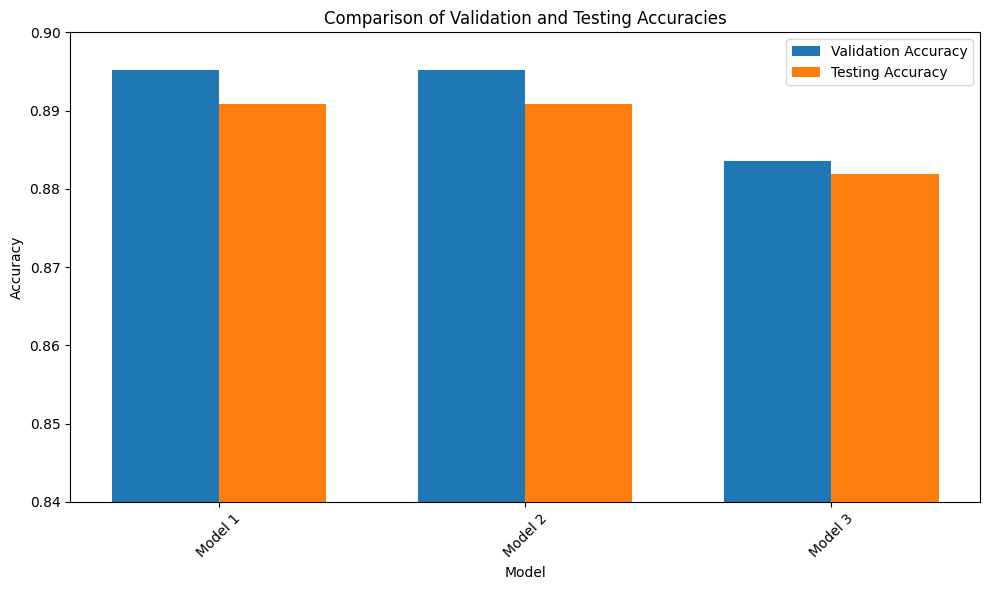

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'],
                        'Validation Accuracy': [rf_model1_score, rf_model2_score, rf_model3_score],
                        'Testing Accuracy': [rf_model1_Test_Score, rf_model2_Test_Score, rf_model3_Test_Score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results))
plt.ylim(0.84, 0.90) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.bar(index, results['Validation Accuracy'], bar_width, label='Validation Accuracy')
plt.bar(index + bar_width, results['Testing Accuracy'], bar_width, label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation and Testing Accuracies')
plt.xticks(index + bar_width/2, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

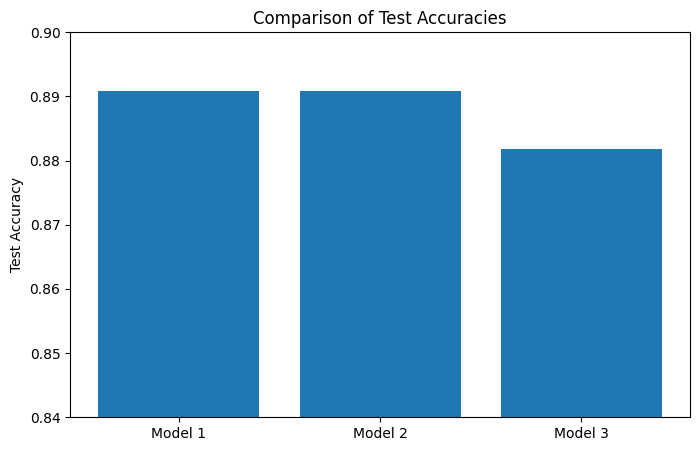

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Data
models = ['Model 1', 'Model 2', 'Model 3']
test_accuracies = [rf_model1_Test_Score, rf_model2_Test_Score, rf_model3_Test_Score]
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies)
# Set the y-axis limits
plt.ylim(0.84, 0.90) 
# Set the y-axis tick label format to two decimal places
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# Set the y-axis label
plt.ylabel('Test Accuracy')
# Set the plot title
plt.title('Comparison of Test Accuracies')
# Show the plot
plt.show()

### Model Selection & Evaluation 

In [62]:
# Comparing the scores of Random Forest models:
rf_scores = [rf_model1_score, rf_model2_score, rf_model3_score]
best_rf_model_index = np.argmax(rf_scores)
best_rf_model = [rf_model1, rf_model2, rf_model3][best_rf_model_index]
best_rf_model

RandomForestClassifier(random_state=42)

In [63]:
model_names = ['Model 1', 'Model 2', 'Model 3']
best_rf_model_number = best_rf_model_index + 1
best_rf_model_name = model_names[best_rf_model_index]
print("The best model is:", best_rf_model_name)

The best model is: Model 1


**FINDING OUT THE PRECISON, RECALL & F1-SCORE OF THE BEST SELECTED MODEL:**

###### We have computed weighted evaluation metrics as our classes are imbalanced. 
REASON: on average=macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset. average=weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions for the test set
y_pred = rf_model1.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Accuracy: {:.4f}".format(rf_accuracy))
print("Precision: {:.4f}".format(rf_precision))
print("Recall: {:.4f}".format(rf_recall))
print("F1-Score: {:.4f}".format(rf_f1))



Accuracy: 0.8908
Precision: 0.8751
Recall: 0.8908
F1-Score: 0.8604


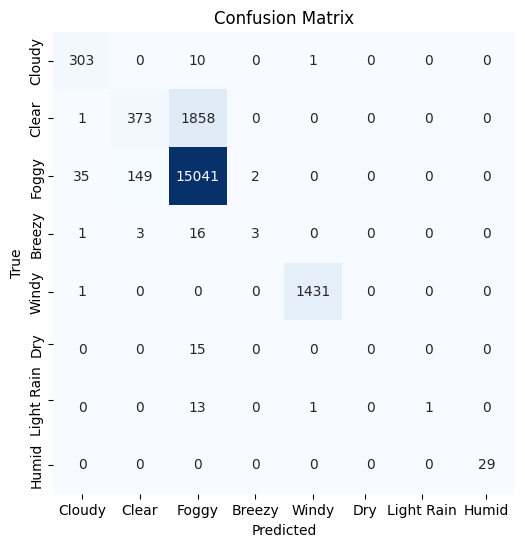

In [65]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Cloudy', 'Clear', 'Foggy', 'Breezy', 'Windy', 'Dry', 'Light Rain', 'Humid']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, square=True, cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, va='center')

# Display the plot
plt.show()


## **DECISION TREE**

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Model 1: Increased maximum depth of the tree
dt_model1 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model1.fit(X_train, y_train)
#Validation Accuracy
dt_model1_score = dt_model1.score(X_val, y_val)
dt_model1_score

0.8815218095793635

In [68]:
#Test Accuracy
dt_model1_Test_Score=dt_model1.score(X_test, y_test)
dt_model1_Test_Score

0.8808523876186032

In [69]:
# Model 2: With Min_samples & Max_Depth 
dt_model2 = DecisionTreeClassifier(min_samples_split=5, max_depth=10, random_state=42)
dt_model2.fit(X_train, y_train)
#Validation Accuracy
dt_model2_score = dt_model2.score(X_val, y_val)
dt_model2_score

0.8834013869985093

In [70]:
#Test Accuracy
dt_model2_Test_Score=dt_model2.score(X_test, y_test)
dt_model2_Test_Score

0.8824596878726604

In [71]:
# Model 3: With Different Min_samples & Max_Depth
dt_model3 = DecisionTreeClassifier(min_samples_split=50, max_depth=15, random_state=42)
dt_model3.fit(X_train, y_train)
#Validation Accuracy
dt_model3_score = dt_model3.score(X_val, y_val)
dt_model3_score

0.8741331259316871

In [72]:
#Test Accuracy
dt_model3_Test_Score=dt_model3.score(X_test, y_test)
dt_model3_Test_Score

0.8736454606729922

### **TABULAR REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF DECISION TREE MODEL**

In [73]:
# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Decision Tree (Model 1)', 'Decision Tree (Model 2)', 'Decision Tree (Model 3)'],
                        'Validation Accuracy': [dt_model1_score, dt_model2_score, dt_model3_score],'Testing Accuracy': [dt_model1_Test_Score,dt_model2_Test_Score, dt_model3_Test_Score]})

# Sorting the results by Validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Sorting the results by Testing accuracy in descending order
results = results.sort_values(by='Testing Accuracy', ascending=False)

# Printing the results
print(results)

                     Model  Validation Accuracy  Testing Accuracy
1  Decision Tree (Model 2)             0.883401          0.882460
0  Decision Tree (Model 1)             0.881522          0.880852
2  Decision Tree (Model 3)             0.874133          0.873645


### GRAPHICAL REPRESENTATION OF ACCURACIES OF DECISION TREE  MODELS

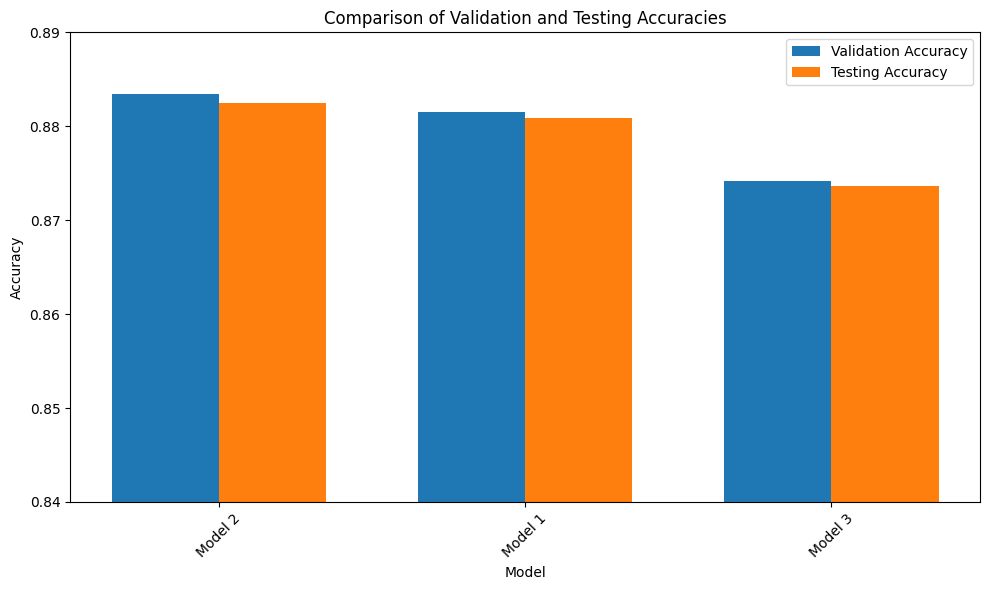

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'],
                        'Validation Accuracy': [dt_model1_score, dt_model2_score, dt_model3_score],
                        'Testing Accuracy': [dt_model1_Test_Score, dt_model2_Test_Score, dt_model3_Test_Score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results))
plt.ylim(0.84, 0.89) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.bar(index, results['Validation Accuracy'], bar_width, label='Validation Accuracy')
plt.bar(index + bar_width, results['Testing Accuracy'], bar_width, label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation and Testing Accuracies')
plt.xticks(index + bar_width/2, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

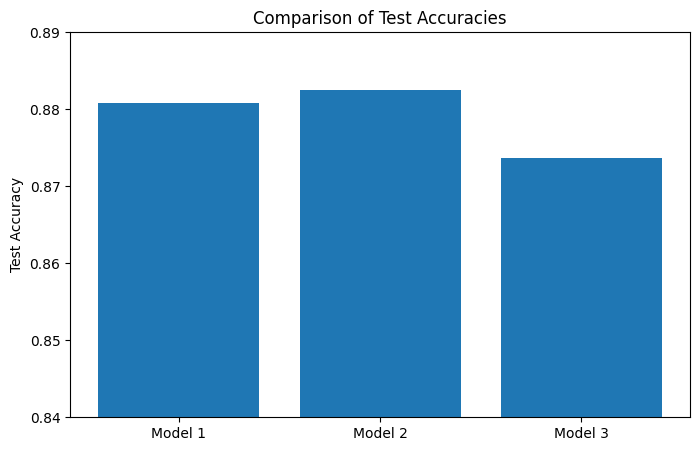

In [75]:
# Data
models = ['Model 1', 'Model 2', 'Model 3']
test_accuracies = [dt_model1_Test_Score, dt_model2_Test_Score, dt_model3_Test_Score]
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies)
# Set the y-axis limits
plt.ylim(0.84, 0.89) 
# Set the y-axis tick label format to two decimal places
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# Set the y-axis label
plt.ylabel('Test Accuracy')
# Set the plot title
plt.title('Comparison of Test Accuracies')
# Show the plot
plt.show()

### Model Selection & Evaluation

In [76]:
# Comparing the scores of Decision Tree models:
dt_scores = [dt_model1_score, dt_model2_score, dt_model3_score]
best_dt_model_index = np.argmax(dt_scores)
best_dt_model = [dt_model1, dt_model2, dt_model3][best_dt_model_index]
best_dt_model

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [77]:
model_names = ['Model 1', 'Model 2', 'Model 3']
best_dt_model_index = np.argmax(dt_scores)
best_dt_model_number = best_dt_model_index + 1
best_dt_model_name = model_names[best_dt_model_index]
print("The best model is:", best_dt_model_name)

The best model is: Model 2


**FINDING OUT THE PRECISON, RECALL & F1-SCORE OF THE BEST SELECTED MODELS:**

Accuracy: 0.8825
Precision: 0.8554
Recall: 0.8825
F1-Score: 0.8449


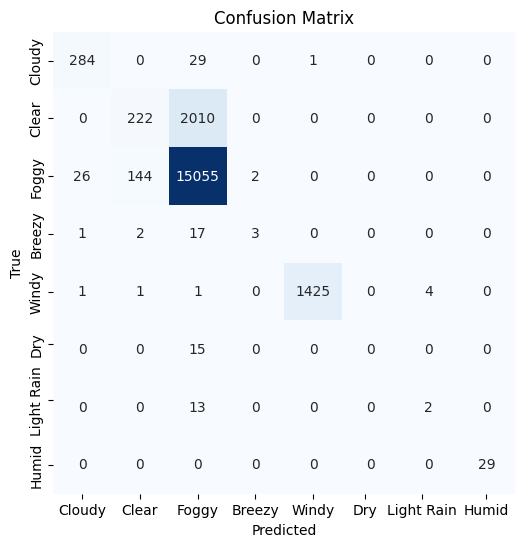

In [78]:
# Make predictions for the test set
y_pred = dt_model2.predict(X_test)
# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')
# Display evaluation metrics
print("Accuracy: {:.4f}".format(dt_accuracy))
print("Precision: {:.4f}".format(dt_precision))
print("Recall: {:.4f}".format(dt_recall))
print("F1-Score: {:.4f}".format(dt_f1))


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Define class labels
class_labels = ['Cloudy', 'Clear', 'Foggy', 'Breezy', 'Windy', 'Dry', 'Light Rain', 'Humid']
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, square=True, cbar=False)
# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, va='center')
# Display the plot
plt.show()

## **GRADIENT BOOSTING**

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Model 1: Default parameters
gb_model_1 = GradientBoostingClassifier(random_state=42)
gb_model_1.fit(X_train, y_train)
#Validation Accuracy
gb_model_1_score=gb_model_1.score(X_val,y_val)
gb_model_1_score

0.8838550780996824

In [81]:
#Test Accuracy
gb_model_1_Test_Score=gb_model_1.score(X_test, y_test)
gb_model_1_Test_Score

0.8834966557785037

In [82]:
# Model 2: Increased number of estimators and learning rate
gb_model_2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
gb_model_2.fit(X_train, y_train)
#Validation Accuracy
gb_model_2_score=gb_model_2.score(X_val,y_val)
gb_model_2_score

0.8869661027934409

In [83]:
#Test Accuracy
gb_model_2_Test_Score=gb_model_2.score(X_test, y_test)
gb_model_2_Test_Score

0.8856742883807747

In [84]:
# Model 3: Increased maximum depth of the trees
gb_model_3 = GradientBoostingClassifier(max_depth=5, random_state=42)
gb_model_3.fit(X_train, y_train)
#Validation Accuracy
gb_model_3_score=gb_model_3.score(X_val,y_val)
gb_model_3_score

0.8886512411692268

In [85]:
#Test Accuracy
gb_model_3_Test_Score=gb_model_3.score(X_test, y_test)
gb_model_3_Test_Score

0.8859335303572354

### **TABULAR REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF GRADIENT BOOSTING MODEL**

In [86]:
# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Gradient Boosting (Model 1)', 'Gradient Boosting (Model 2)', 'Gradient Boosting (Model 3)'],
                        'Validation Accuracy': [gb_model_1_score, gb_model_2_score, gb_model_3_score],'Testing Accuracy': [gb_model_1_Test_Score,gb_model_2_Test_Score, gb_model_3_Test_Score]})

# Sorting the results by Validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Sorting the results by Testing accuracy in descending order
results = results.sort_values(by='Testing Accuracy', ascending=False)

# Printing the results
print(results)

                         Model  Validation Accuracy  Testing Accuracy
2  Gradient Boosting (Model 3)             0.888651          0.885934
1  Gradient Boosting (Model 2)             0.886966          0.885674
0  Gradient Boosting (Model 1)             0.883855          0.883497


### GRAPHICAL REPRESENTATION OF ACCURACIES OF GRADIENT BOOSTING MODEL

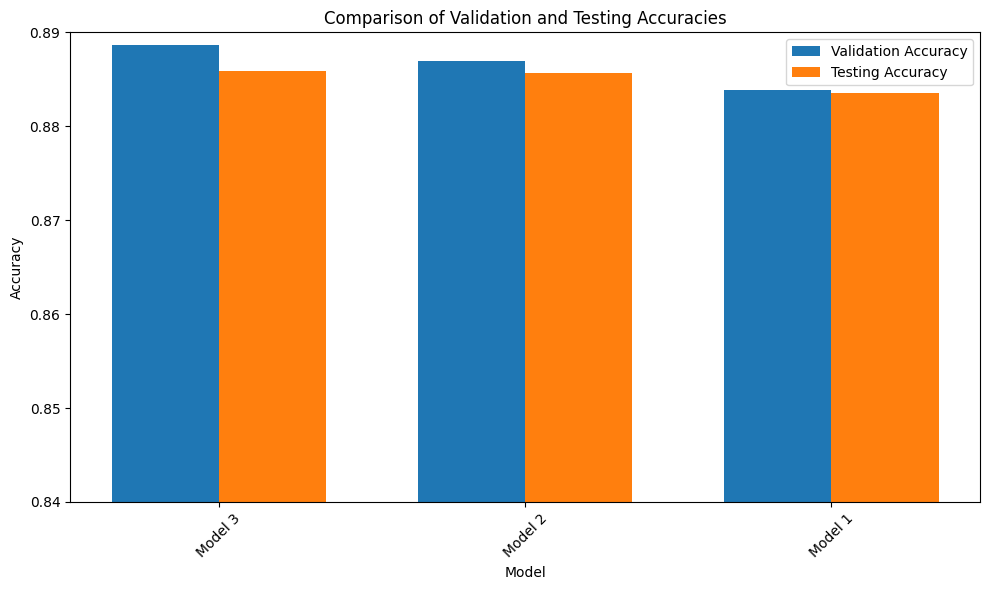

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'],
                        'Validation Accuracy': [gb_model_1_score, gb_model_2_score, gb_model_3_score],
                        'Testing Accuracy': [gb_model_1_Test_Score, gb_model_2_Test_Score, gb_model_3_Test_Score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results))
plt.ylim(0.84, 0.89) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.bar(index, results['Validation Accuracy'], bar_width, label='Validation Accuracy')
plt.bar(index + bar_width, results['Testing Accuracy'], bar_width, label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation and Testing Accuracies')
plt.xticks(index + bar_width/2, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

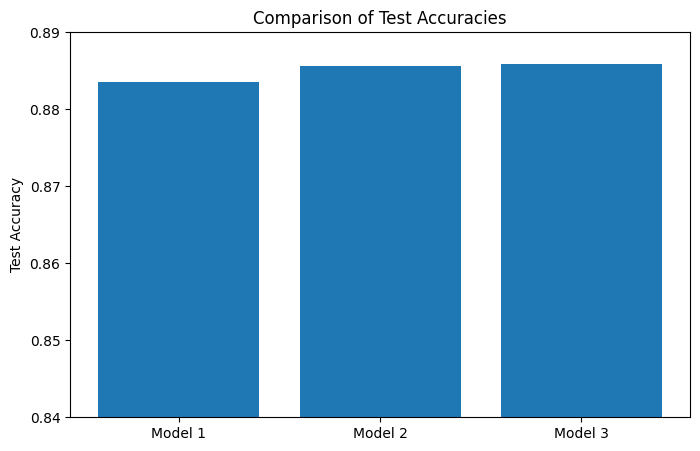

In [88]:
# Data
models = ['Model 1', 'Model 2', 'Model 3']
test_accuracies = [gb_model_1_Test_Score, gb_model_2_Test_Score, gb_model_3_Test_Score]
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies)
# Set the y-axis limits
plt.ylim(0.84, 0.89)
# Set the y-axis tick label format to two decimal places
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# Set the y-axis label
plt.ylabel('Test Accuracy')
# Set the plot title
plt.title('Comparison of Test Accuracies')
# Show the plot
plt.show()

### Model Selection & Evaluation

In [89]:
# Comparing the scores of Gradient Boosting models:
gb_scores = [gb_model_1_score, gb_model_2_score, gb_model_3_score]
best_gb_model_index = np.argmax(gb_scores)
best_gb_model = [gb_model_1, gb_model_2, gb_model_3][best_gb_model_index]
best_gb_model


GradientBoostingClassifier(max_depth=5, random_state=42)

In [90]:
model_names = ['Model 1', 'Model 2', 'Model 3']
best_gb_model_number = best_gb_model_index + 1
best_gb_model_name = model_names[best_gb_model_index]
print("The best model is:", best_gb_model_name)


The best model is: Model 3


**FINDING OUT THE PRECISON, RECALL & F1-SCORE OF THE BEST SELECTED MODELS:**

Accuracy: 0.8859
Precision: 0.8704
Recall: 0.8859
F1-Score: 0.8521


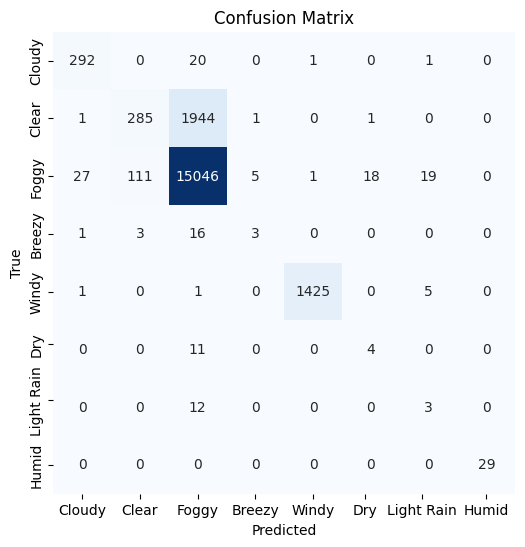

In [91]:
# Make predictions for the test set
y_pred = gb_model_3.predict(X_test)
# Calculate evaluation metrics
gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred, average='weighted')
gb_recall = recall_score(y_test, y_pred, average='weighted')
gb_f1 = f1_score(y_test, y_pred, average='weighted')
# Display evaluation metrics
print("Accuracy: {:.4f}".format(gb_accuracy))
print("Precision: {:.4f}".format(gb_precision))
print("Recall: {:.4f}".format(gb_recall))
print("F1-Score: {:.4f}".format(gb_f1))


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Define class labels
class_labels = ['Cloudy', 'Clear', 'Foggy', 'Breezy', 'Windy', 'Dry', 'Light Rain', 'Humid']
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, square=True, cbar=False)
# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, va='center')
# Display the plot
plt.show()

# **PARAMETRIC SHALLOW ALGORITHMS**

Below Implemented are 2 Parametric(Shallow) Machine learning Models:                                                             
1.Gaussian Naive Bayes.                                                                                                        
2.Logistic regression.

## LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
# Model 1: Logistic Regression with default hyperparameters
lr_model1 = LogisticRegression(random_state=42, max_iter=1000)
lr_model1.fit(X_train, y_train)
lr_model1_score = lr_model1.score(X_val, y_val)
lr_model1_score

0.867457385442997

In [94]:
#Test Accuracy
lr_model1_Test_Score=lr_model1.score(X_test, y_test)
lr_model1_Test_Score

0.8690309534919894

In [95]:
# Model 2: Logistic Regression with increased regularization strength (C)
lr_model2 = LogisticRegression(C=1.0, random_state=42, max_iter=1000)
lr_model2.fit(X_train, y_train)
lr_model2_score = lr_model2.score(X_val, y_val)
lr_model2_score

0.867457385442997

In [96]:
#Test Accuracy
lr_model2_Test_Score=lr_model2.score(X_test, y_test)
lr_model2_Test_Score

0.8690309534919894

In [97]:
# Model 3: Logistic Regression with different solver
lr_model3 = LogisticRegression(solver='liblinear', random_state=42)
lr_model3.fit(X_train, y_train)
lr_model3_score = lr_model3.score(X_val, y_val)
lr_model3_score

0.8561151079136691

In [98]:
#Test Accuracy
lr_model3_Test_Score=lr_model3.score(X_test, y_test)
lr_model3_Test_Score

0.856691035412454

### **TABULAR REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF LOGISTIC REGRESSION MODEL**

In [99]:
# Create a table to compare the accuracies
results = pd.DataFrame({'Model': ['Logistic Regression (Model 1)', 'Logistic Regression (Model 2)', 'Logistic Regression (Model 3)'],
                        'Validation Accuracy': [lr_model1_score, lr_model2_score, lr_model3_score],'Testing Accuracy': [lr_model1_Test_Score,lr_model2_Test_Score, lr_model3_Test_Score]})

# Sort the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Sorting the results by Testing accuracy in descending order
results = results.sort_values(by='Testing Accuracy', ascending=False)

# Print the results
print(results)

                           Model  Validation Accuracy  Testing Accuracy
0  Logistic Regression (Model 1)             0.867457          0.869031
1  Logistic Regression (Model 2)             0.867457          0.869031
2  Logistic Regression (Model 3)             0.856115          0.856691


### GRAPHICAL REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF LOGISTIC REGRESSION MODEL

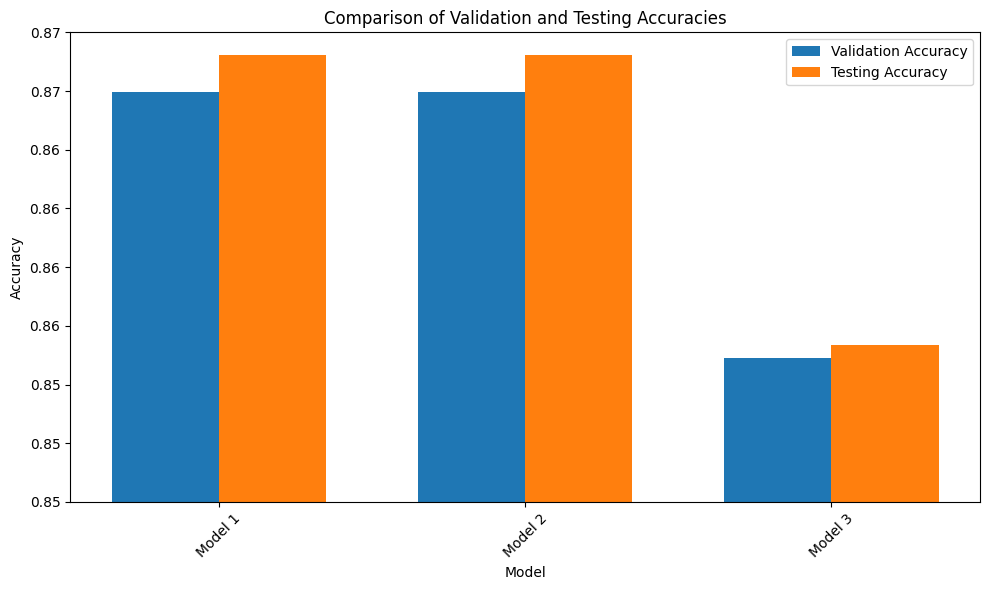

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'],
                        'Validation Accuracy': [lr_model1_score, lr_model2_score, lr_model3_score],
                        'Testing Accuracy': [lr_model1_Test_Score, lr_model2_Test_Score, lr_model3_Test_Score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results))
plt.ylim(0.85, 0.87) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.bar(index, results['Validation Accuracy'], bar_width, label='Validation Accuracy')
plt.bar(index + bar_width, results['Testing Accuracy'], bar_width, label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation and Testing Accuracies')
plt.xticks(index + bar_width/2, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

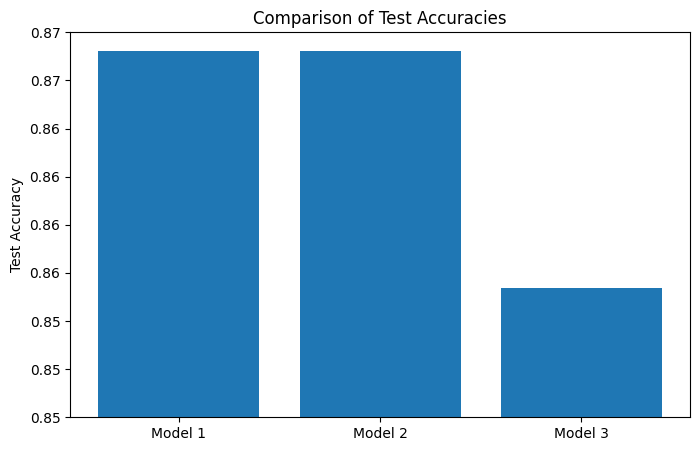

In [101]:
import matplotlib.pyplot as plt

# Data
models = ['Model 1', 'Model 2', 'Model 3']
test_accuracies = [lr_model1_Test_Score, lr_model2_Test_Score, lr_model3_Test_Score]
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies)
# Set the y-axis limits
plt.ylim(0.85, 0.87)
# Set the y-axis tick label format to two decimal places
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# Set the y-axis label
plt.ylabel('Test Accuracy')
# Set the plot title
plt.title('Comparison of Test Accuracies')
# Show the plot
plt.show()


### Model Selection & Evaluation

In [102]:
# Comparing the scores of Logistic Regression models:
lr_scores = [lr_model1_score, lr_model2_score, lr_model3_score]
best_lr_model_index = np.argmax(lr_scores)
best_lr_model = [lr_model1, lr_model2, lr_model3][best_lr_model_index]
best_lr_model

LogisticRegression(max_iter=1000, random_state=42)

In [103]:
model_names = ['Model 1', 'Model 2', 'Model 3']
best_lr_model_number = best_lr_model_index + 1
best_lr_model_name = model_names[best_lr_model_index]
print("The best model is:", best_lr_model_name)


The best model is: Model 1


**FINDING OUT THE PRECISON, RECALL & F1-SCORE OF THE BEST SELECTED MODELS:**### Logistic Regression

Accuracy: 0.8690
Precision: 0.8169
Recall: 0.8690
F1-Score: 0.8148


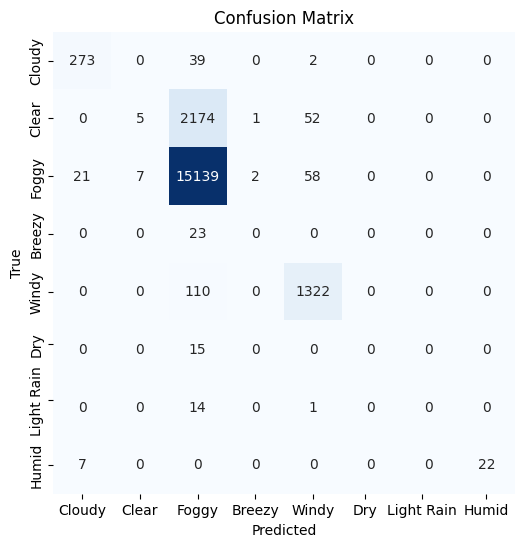

In [146]:
# Make predictions for the test set
y_pred = lr_model1.predict(X_test)
# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')
# Display evaluation metrics
print("Accuracy: {:.4f}".format(gb_accuracy))
print("Precision: {:.4f}".format(gb_precision))
print("Recall: {:.4f}".format(gb_recall))
print("F1-Score: {:.4f}".format(gb_f1))


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Define class labels
class_labels = ['Cloudy', 'Clear', 'Foggy', 'Breezy', 'Windy', 'Dry', 'Light Rain', 'Humid']
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, square=True, cbar=False)
# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, va='center')
# Display the plot
plt.show()

## **GAUSSIAN NAIVE BAYES**

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:
#Model 1: Gaussian Naive Bayes with default hyperparameters
gnb_model1 = GaussianNB()
gnb_model1.fit(X_train, y_train)
#Validation Accuracy
gnb_model1_score = gnb_model1.score(X_val, y_val)
gnb_model1_score

0.3245187633676842

In [107]:
#Test Accuracy
gnb_model1_Test_score = gnb_model1.score(X_test, y_test)
gnb_model1_Test_score

0.32887437133820707

In [108]:
#Model 2: Gaussian Naive Bayes with hyperparameter tuning (Grid Search)
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0]}
gnb_model2 = GridSearchCV(GaussianNB(), param_grid)
gnb_model2.fit(X_train, y_train)
#Validation Accuracy
gnb_model2_score = gnb_model2.score(X_val, y_val)
gnb_model2_score


0.815347721822542

In [109]:
#Test Accuracy
gnb_model2_Test_score = gnb_model2.score(X_test, y_test)
gnb_model2_Test_score

0.8155234095504744

In [110]:
#Model 3: Gaussian Naive Bayes with hyperparameter tuning (Randomized Search)
param_dist = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]}
gnb_model3 = RandomizedSearchCV(GaussianNB(), param_dist)
gnb_model3.fit(X_train, y_train)
#Validation Accuracy
gnb_model3_score = gnb_model3.score(X_val, y_val)
gnb_model3_score

0.815347721822542

In [111]:
#Test Accuracy
gnb_model3_Test_score = gnb_model3.score(X_test, y_test)
gnb_model3_Test_score

0.8155234095504744

### **TABULAR REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF NAIVE BAYES MODEL**

In [112]:
# Create a table to compare the accuracies
results = pd.DataFrame({'Model': ['Naive Bayes (Model 1)', 'Naive Bayes (Model 2)', 'Naive Bayes (Model 3)'],
                        'Validation Accuracy': [gnb_model1_score, gnb_model2_score, gnb_model3_score],'Testing Accuracy': [gnb_model1_Test_score,gnb_model2_Test_score, gnb_model3_Test_score]})

# Sort the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Sorting the results by Testing accuracy in descending order
results = results.sort_values(by='Testing Accuracy', ascending=False)

# Print the results
print(results)

                   Model  Validation Accuracy  Testing Accuracy
1  Naive Bayes (Model 2)             0.815348          0.815523
2  Naive Bayes (Model 3)             0.815348          0.815523
0  Naive Bayes (Model 1)             0.324519          0.328874


### GRAPHICAL REPRESENTATION OF VALIDATION AND TESTING ACCURACIES OF GAUSSIAN NAIVE BAYES MODEL

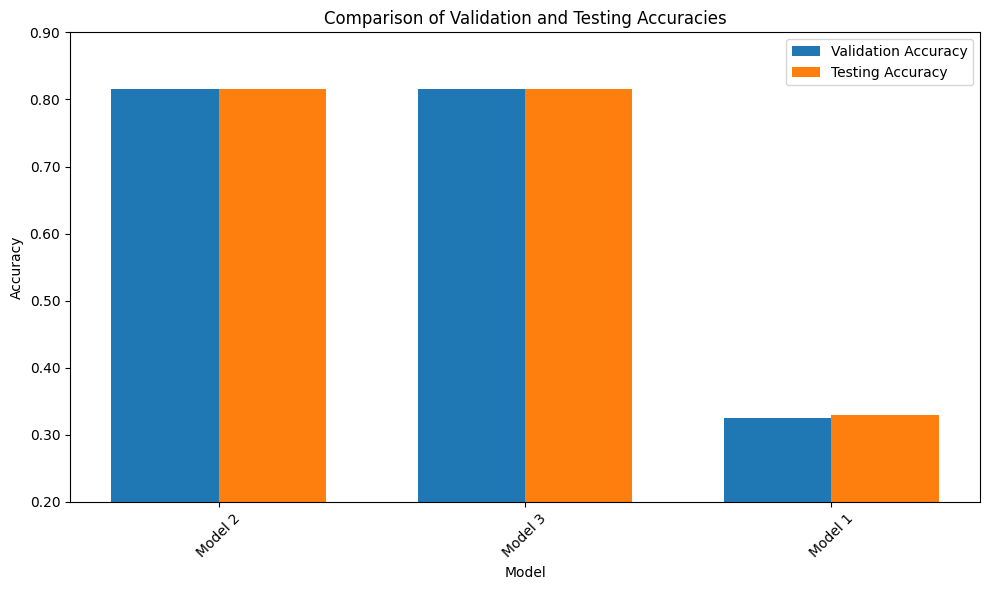

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Creating a table to compare the accuracies
results = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'],
                        'Validation Accuracy': [gnb_model1_score, gnb_model2_score, gnb_model3_score],
                        'Testing Accuracy': [gnb_model1_Test_score, gnb_model2_Test_score, gnb_model3_Test_score]})

# Sorting the results by validation accuracy in descending order
results = results.sort_values(by='Validation Accuracy', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results))
plt.ylim(0.2, 0.90) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.bar(index, results['Validation Accuracy'], bar_width, label='Validation Accuracy')
plt.bar(index + bar_width, results['Testing Accuracy'], bar_width, label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Validation and Testing Accuracies')
plt.xticks(index + bar_width/2, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

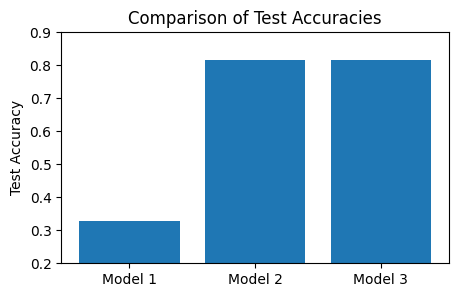

In [114]:
import matplotlib.pyplot as plt

# Data
models = ['Model 1', 'Model 2', 'Model 3']
test_accuracies = [gnb_model1_Test_score,gnb_model2_Test_score, gnb_model3_Test_score]

# Create a bar plot
plt.bar(models, test_accuracies)

# Set the y-axis limits
plt.ylim(0.2, 0.9)

# Set the y-axis label
plt.ylabel('Test Accuracy')

# Set the plot title
plt.title('Comparison of Test Accuracies')

# Show the plot
plt.show()


### Model Selection & Evaluation

In [115]:
# Comparing the scores of Naive Bayes models:
gnb_scores = [gnb_model1_score, gnb_model2_score, gnb_model3_score]
best_gnb_model_index = np.argmax(gnb_scores)
best_gnb_model = [gnb_model1, gnb_model2, gnb_model3][best_gnb_model_index]
best_gnb_model

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1.0]})

In [116]:
model_names = ['Model 1', 'Model 2', 'Model 3']
best_gnb_model_number = best_gnb_model_index + 1
best_gnb_model_name = model_names[best_gnb_model_index]
print("The best model is:", best_gnb_model_name)

The best model is: Model 2


**FINDING OUT THE PRECISON, RECALL & F1-SCORE OF THE BEST SELECTED MODELS:**

Accuracy: 0.8155
Precision: 0.7846
Recall: 0.8155
F1-Score: 0.7880


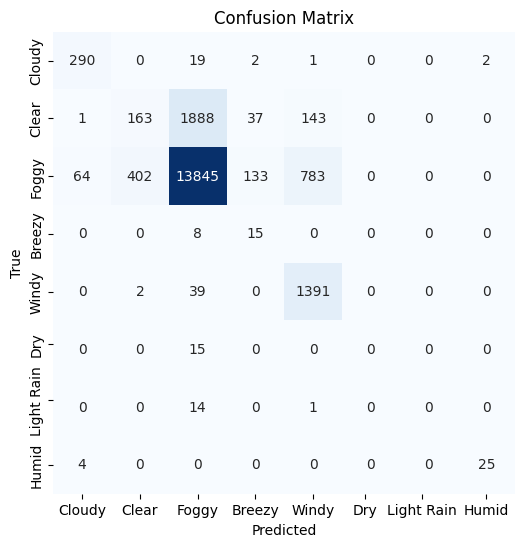

In [117]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions for the test set
y_pred = gnb_model2.predict(X_test)

# Calculate evaluation metrics
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
gnb_recall = recall_score(y_test, y_pred, average='weighted')
gnb_f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Accuracy: {:.4f}".format(gnb_accuracy))
print("Precision: {:.4f}".format(gnb_precision))
print("Recall: {:.4f}".format(gnb_recall))
print("F1-Score: {:.4f}".format(gnb_f1))


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Cloudy', 'Clear', 'Foggy', 'Breezy', 'Windy', 'Dry', 'Light Rain', 'Humid']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, square=True, cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, ha='center')
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.4, 6.38, 7.5], labels=class_labels, va='center')

# Display the plot
plt.show()

## **MODEL SELECTION**

**Comparing the performance of the models on the Test set and selecting
the best-performing model for each algorithm based on the evaluation metrics:**

## COMPARISON OF NON-PARAMETRIC ALGORITHMS

##### We're comparing the best selected model of each algorithm

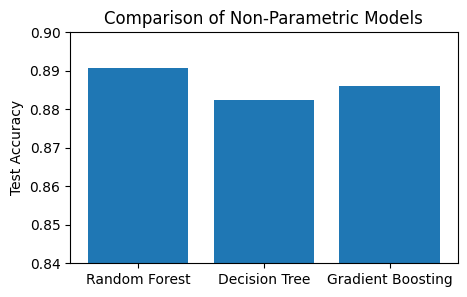

In [134]:
import matplotlib.pyplot as plt

# Data
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting']
test_accuracies = [rf_model1_Test_Score, dt_model2_Test_Score, gb_model_3_Test_Score]

# Create a bar plot
plt.bar(model_names, test_accuracies)

# Set the y-axis label
plt.ylabel('Test Accuracy')

# Set the y-axis limits
plt.ylim(0.84, 0.90)

# Set the plot title
plt.title('Comparison of Non-Parametric Models')

# Show the plot
plt.show()


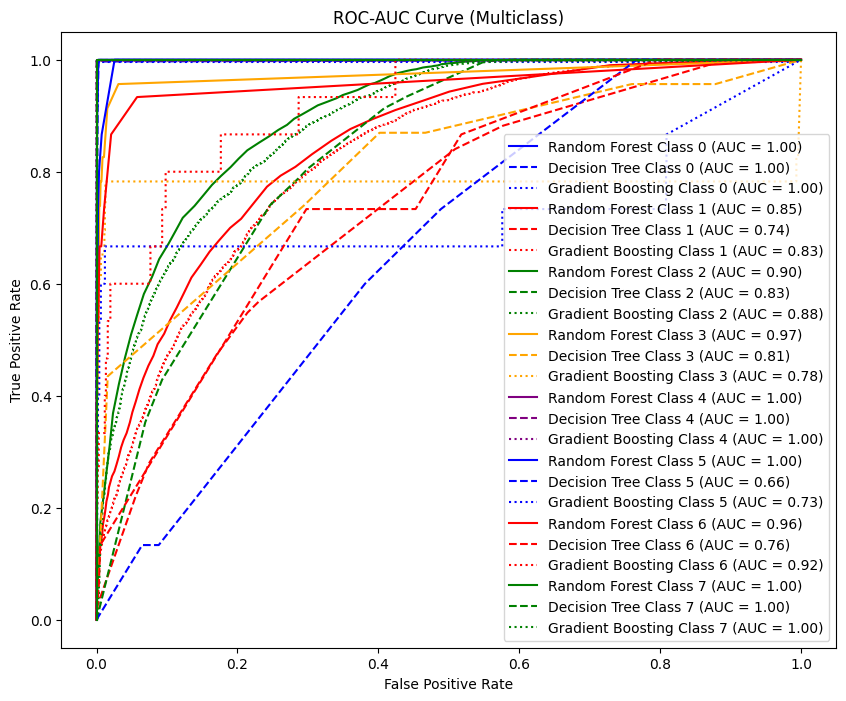

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert the labels to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probabilities for each class and each model
rf_probs = rf_model1.predict_proba(X_test)
dt_probs = dt_model1.predict_proba(X_test)
gb_probs = gb_model_3.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and AUC for each class and each model
n_classes = y_test_onehot.shape[1]
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
gb_fpr = dict()
gb_tpr = dict()
gb_auc = dict()

for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test_onehot[:, i], rf_probs[:, i])
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_onehot[:, i], dt_probs[:, i])
    gb_fpr[i], gb_tpr[i], _ = roc_curve(y_test_onehot[:, i], gb_probs[:, i])
    rf_auc[i] = roc_auc_score(y_test_onehot[:, i], rf_probs[:, i])
    dt_auc[i] = roc_auc_score(y_test_onehot[:, i], dt_probs[:, i])
    gb_auc[i] = roc_auc_score(y_test_onehot[:, i], gb_probs[:, i])

# Plot the ROC-AUC curve for each class and each model
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(rf_fpr[i], rf_tpr[i], color=color, label='Random Forest Class {} (AUC = {:.2f})'.format(i, rf_auc[i]))
    plt.plot(dt_fpr[i], dt_tpr[i], color=color, linestyle='--', label='Decision Tree Class {} (AUC = {:.2f})'.format(i, dt_auc[i]))
    plt.plot(gb_fpr[i], gb_tpr[i], color=color, linestyle=':', label='Gradient Boosting Class {} (AUC = {:.2f})'.format(i, gb_auc[i]))

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the plot title
plt.title('ROC-AUC Curve (Multiclass)')

# Add a legend
plt.legend()

# Show the plot
plt.savefig('ROCnp.png') 

plt.show()


In [143]:
from sklearn.metrics import roc_auc_score
weighted_auc_rf = roc_auc_score(y_test_onehot, rf_probs, average='weighted')
weighted_auc_dt = roc_auc_score(y_test_onehot, dt_probs, average='weighted')
weighted_auc_gb = roc_auc_score(y_test_onehot, gb_probs, average='weighted')
print("Random Forest-average AUC :", weighted_auc_rf)
print("Decsion Tree-average AUC:", weighted_auc_dt)
print("Gradient Boosting-average AUC:", weighted_auc_gb)

Random Forest-average AUC : 0.9036842802366405
Decsion Tree-average AUC: 0.8354675684982065
Gradient Boosting-average AUC: 0.8883042136033715


## COMPARISON OF PARAMETRIC ALGORITHMS

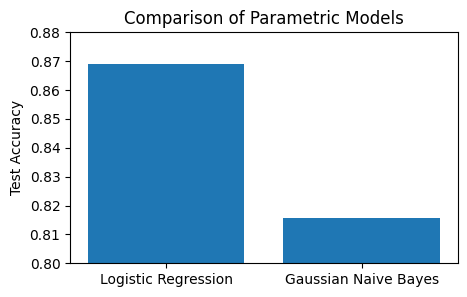

In [135]:
import matplotlib.pyplot as plt

# Data
model_names = ['Logistic Regression', 'Gaussian Naive Bayes']
test_accuracies = [lr_model1_Test_Score, gnb_model2_Test_score]

# Create a bar plot
plt.bar(model_names, test_accuracies)

# Set the y-axis label
plt.ylabel('Test Accuracy')

# Set the y-axis limits
plt.ylim(0.80, 0.88)

# Set the plot title
plt.title('Comparison of Parametric Models')

# Show the plot
plt.show()


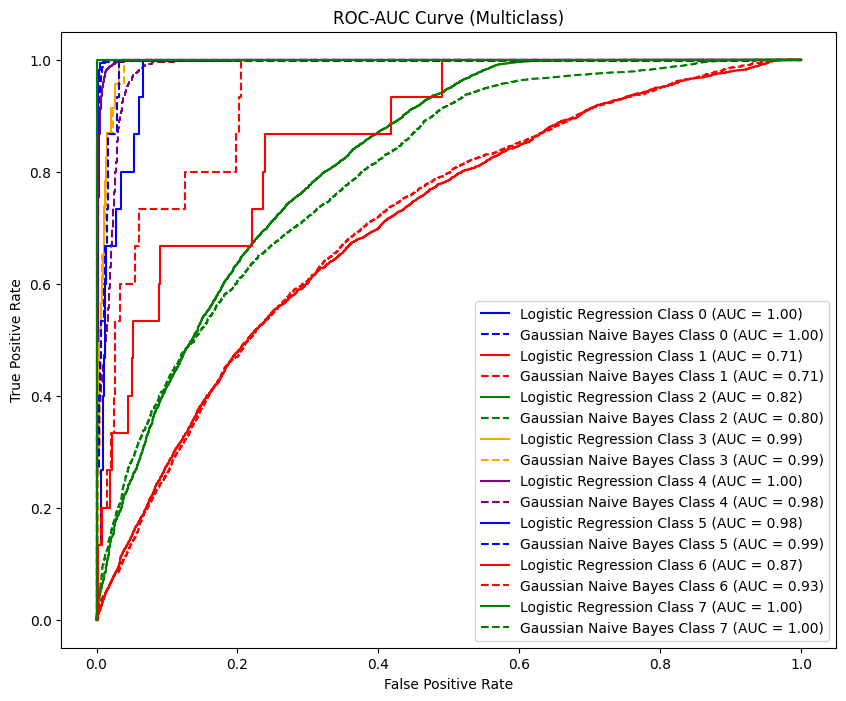

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert the labels to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probabilities for each class and each model
lr_probs = lr_model1.predict_proba(X_test)
gnb_probs = gnb_model2.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and AUC for each class and each model
n_classes = y_test_onehot.shape[1]
lr_fpr = dict()
lr_tpr = dict()
lr_auc = dict()
gnb_fpr = dict()
gnb_tpr = dict()
gnb_auc = dict()

for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_onehot[:, i], lr_probs[:, i])
    gnb_fpr[i], gnb_tpr[i], _ = roc_curve(y_test_onehot[:, i], gnb_probs[:, i])
    lr_auc[i] = roc_auc_score(y_test_onehot[:, i], lr_probs[:, i])
    gnb_auc[i] = roc_auc_score(y_test_onehot[:, i], gnb_probs[:, i])

# Plot the ROC-AUC curve for each class and each model
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(lr_fpr[i], lr_tpr[i], color=color, label='Logistic Regression Class {} (AUC = {:.2f})'.format(i, lr_auc[i]))
    plt.plot(gnb_fpr[i], gnb_tpr[i], color=color, linestyle='--', label='Gaussian Naive Bayes Class {} (AUC = {:.2f})'.format(i, gnb_auc[i]))

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the plot title
plt.title('ROC-AUC Curve (Multiclass)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [141]:
from sklearn.metrics import roc_auc_score
weighted_auc_lr = roc_auc_score(y_test_onehot, lr_probs, average='weighted')
weighted_auc_gnb = roc_auc_score(y_test_onehot, gnb_probs, average='weighted')
print("Logistic Regression-average AUC :", weighted_auc_lr)
print("Gaussian Naive Bayes-average AUC:", weighted_auc_gnb)

Logistic Regression-average AUC : 0.8233469653699756
Gaussian Naive Bayes-average AUC: 0.8053572640820084


### Combined Results:

In [147]:
# Results
print("Testing Performances for Machine Learning Algorithms")
result = pd.DataFrame({"Algorithms":['Logistic Regression', "Gaussian Naive Bayes", "Decision Tree","Random Forest","Gradient Boosting Classifier"],
                       "Accuracy":[lr_accuracy, gnb_accuracy,  dt_accuracy, rf_accuracy, gb_accuracy],
                       "Precision":[lr_precision, gnb_precision, dt_precision, rf_precision, gb_precision],
                       "Recall":[lr_recall, gnb_recall, dt_recall, rf_recall, gb_recall],
                       "F1 Score":[lr_f1, gnb_f1, dt_f1, rf_f1, gb_f1]}).set_index('Algorithms')
result

Testing Performances for Machine Learning Algorithms


,Accuracy,Precision,Recall,F1 Score
Algorithms,,,,
Logistic Regression,0.869031,0.816880,0.869031,0.814843
Gaussian Naive Bayes,0.815523,0.784583,0.815523,0.788038
Decision Tree,0.882460,0.855351,0.882460,0.844916
Random Forest,0.890807,0.875059,0.890807,0.860425
Gradient Boosting Classifier,0.869031,0.816880,0.869031,0.814843


## [ANN & Interface work to be incorporated...]

 ░░░░░░▄▄▄▄▀▀▀▀▀▀▀▀▄▄▄▄▄▄▄
    ░░░░░█░░░░░░░░░░░░░░░░░░▀▀▄
    ░░░░█░░░░░░░░░░░░░░░░░░░░░░█
    ░░░█░░░░░░▄██▀▄▄░░░░░▄▄▄░░░░█
    ░▄▀░▄▄▄░░█▀▀▀▀▄▄█░░░██▄▄█░░░░█
    █░░█░▄░▀▄▄▄▀░░░░░░░░█░░░░░░░░░█
    █░░█░█▀▄▄░░░░░█▀░░░░▀▄░░▄▀▀▀▄░█
    ░█░▀▄░█▄░█▀▄▄░▀░▀▀░▄▄▀░░░░█░░█
    ░░█░░░▀▄▀█▄▄░█▀▀▀▄▄▄▄▀▀█▀██░█
    ░░░█░░░░██░░▀█▄▄▄█▄▄█▄▄██▄░░█
    ░░░░█░░░░▀▀▄░█░░░█░█▀█▀█▀██░█
    ░░░░░▀▄░░░░░▀▀▄▄▄█▄█▄█▄█▄▀░░█
    ░░░░░░░▀▄▄░░░░░░░░░░░░░░░░░░░█
    ░░▐▌░█░░░░▀▀▄▄░░░░░░░░░░░░░░░█
    ░░░█▐▌░░░░░░█░▀▄▄▄▄▄░░░░░░░░█
    ░░███░░░░░▄▄█░▄▄░██▄▄▄▄▄▄▄▄▀
    ░▐████░░▄▀█▀█▄▄▄▄▄█▀▄▀▄
    ░░█░░▌░█░░░▀▄░█▀█░▄▀░░░█
    ░░█░░▌░█░░█░░█░░░█░░█░░█
    ░░█░░▀▀░░██░░█░░░█░░█░░█
    ░░░▀▀▄▄▀▀░█░░░▀▄▀▀▀▀█░░█
    ░░░░░░░░░░█░░░░▄░░▄██▄▄▀
    ░░░░░░░░░░█░░░░▄░░████
    ░░░░░░░░░░█▄░░▄▄▄░░▄█
    ░░░░░░░░░░░█▀▀░▄░▀▀█
    ░░░░░░░░░░░█░░░█░░░█
    ░░░░░░░░░░░█░░░▐░░░█
    ░░░░░░░░░░░█░░░▐░░░█
    ░░░░░░░░░░░█░░░▐░░░█
    ░░░░░░░░░░░█░░░▐░░░█
    ░░░░░░░░░░░█░░░▐░░░█
    ░░░░░░░░░░░█▄▄▄▐▄▄▄█
    ░░░░░░░▄▄▄▄▀▄▄▀█▀▄▄▀▄▄▄▄
    ░░░░░▄▀▄░▄░▄░░░█░░░▄░▄░▄▀▄
    ░░░░░█▄▄▄▄▄▄▄▄▄▀▄▄▄▄▄▄▄▄▄█
    